In [1]:
%load_ext dotenv
%dotenv

In [2]:
from langgraph.graph import START, END, StateGraph
from typing_extensions import TypedDict
from langchain_openai.chat_models import ChatOpenAI
from langchain_core.messages import HumanMessage, BaseMessage
from collections.abc import Sequence
from typing import Literal

In [3]:
class State(TypedDict):
    messages: Sequence[BaseMessage]

In [4]:
chat = ChatOpenAI(model="gpt-4o-mini", seed=365, temperature=0, max_tokens=100)

In [5]:
def ask_question(state: State) -> State:
    print('What is your question?')
    return State(messages = [HumanMessage(input())])

In [6]:
ask_question(State(messages= []))

What is your question?


{'messages': [HumanMessage(content='Can you tell me the grook by Piet Hein?', additional_kwargs={}, response_metadata={})]}

In [7]:
def chatbot(state: State) -> State:
    response = chat.invoke(state['messages'])
    response.pretty_print()
    return State(messages=[response])

In [8]:
def ask_another_question(state: State) -> State:
    print('Would you like to ask one more question?')
    return State(messages = [HumanMessage(input())])

In [9]:
ask_another_question(State(messages=[]))

Would you like to ask one more question?


{'messages': [HumanMessage(content='yes', additional_kwargs={}, response_metadata={})]}

## Define the Routing function

In [10]:
def routing_function(state: State) -> Literal["ask_question", "__end__"]:
    if state["messages"][0].content == 'yes':
        return "ask_question"
    else:
        return "__end__"


## Define the graph

In [17]:
graph = StateGraph(State)

In [18]:
graph.add_node("ask_question", ask_question)
graph.add_node("chatbot", chatbot)
graph.add_node("ask_another_question", ask_another_question)

graph.add_edge(START, "ask_question")
graph.add_edge("ask_question", "chatbot")
graph.add_edge("chatbot", "ask_another_question")
graph.add_conditional_edges(source = "ask_another_question", 
                            path = routing_function)

In [19]:
graph_compiled= graph.compile()

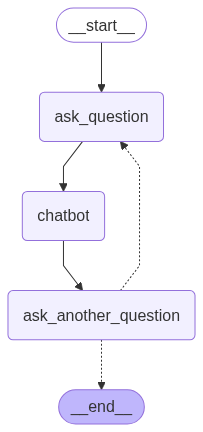

In [20]:
graph_compiled

### Test the Graph

In [21]:
graph_compiled.invoke(State(messages=[]))

What is your question?
================================== Ai Message ==================================

Certainly! Piet Hein was a Danish poet, scientist, and philosopher known for his short, witty poems called "grooks." One of his famous grooks is:

**"The road to wisdom? Well, it’s plain  
And simple to express:  
Err and err and err again  
But less and less and less."**

This grook reflects on the process of learning and the importance of making mistakes along the way. If you would like to know more about his work or specific themes in
Would you like to ask one more question?
What is your question?
================================== Ai Message ==================================

Certainly! Piet Hein was a Danish poet, scientist, and philosopher known for his short, witty poems called "grooks." One of his most famous grooks is:

**"The road to wisdom? Well, it’s plain  
And simple to express:  
Err and err and err again  
But less and less and less."**

This grook reflects on the n

{'messages': [HumanMessage(content='no', additional_kwargs={}, response_metadata={})]}